**Introduction**

*1.1 Problem Statement*

This project focuse on developing ML models for a classification task using traning data given in DS-315 course. It consists of 500 samples, with 8 features labeled 'a' through 'h' arbitrary and binary predicition variable 'y'. The goal is to predict the categorical y variable with as high an accuracy (TN + TP) as possible.

2.1 Data overview exploration

In [477]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

import sklearn.linear_model as skl_lm, statsmodels.api as sm, statsmodels.formula.api as smf
import sklearn
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score


import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('DS315_FA24_train_data.csv')

Basic data examination

In [478]:
df.head()

,a,b,c,d,e,f,g,h,y
0,10,115,0,0,0,35.3,0.134,29,0
1,2,125,60,20,140,33.8,0.088,31,0
2,9,122,56,0,0,33.3,1.114,33,1
3,5,144,82,26,285,32.0,0.452,58,1
4,4,83,86,19,0,29.3,0.317,34,0


Statistical summary

In [479]:
df.describe()

,a,b,c,d,e,f,g,h,y
count,500.00000,500.00000,500.000000,500.000000,500.0000,500.0000,500.000000,500.000000,500.00000
mean,3.99000,121.19400,69.720000,20.638000,75.8480,31.9810,0.481340,33.536000,0.36400
std,3.44756,32.69836,18.992921,16.070578,101.9654,8.0958,0.324488,11.710464,0.48163
min,0.00000,0.00000,0.000000,0.000000,0.0000,0.0000,0.078000,21.000000,0.00000
25%,1.00000,99.00000,64.000000,0.000000,0.0000,26.9750,0.246500,24.000000,0.00000
50%,3.00000,117.00000,72.000000,23.000000,36.5000,32.0000,0.397500,29.000000,0.00000
75%,6.00000,141.00000,80.000000,32.250000,125.2500,36.6500,0.648250,41.000000,1.00000
max,15.00000,199.00000,122.000000,99.000000,545.0000,67.1000,2.420000,72.000000,1.00000


Relationship between features and response

In [480]:
mod = smf.ols(formula = "y ~ a ", data = df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     28.20
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           1.65e-07
Time:                        12:03:06   Log-Likelihood:                -329.91
No. Observations:                 500   AIC:                             663.8
Df Residuals:                     498   BIC:                             672.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2350      0.032      7.319      0.000       0.172       0.298
a              0.0323      0.006      5.311      0.000       0.020       0.044
==============================================================================
Omnibus:                     5368.489   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.120
Skew:                           0.541   Prob(JB):                     9.79e-16
Kurtosis:                       1.535   Cond. No.                         8.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3.Data PreProcessing



Used StandardScaler because:

Features have very different scales 'b' ranges 0-199 and 'g' ranges 0.078-2.42

In [481]:
X = df[['a', 'b', 'c', 'd','e','f','g','h']]
y = df['y']


scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns=['a', 'b', 'c', 'd','e','f','g','h'])


x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size =0.2,
    random_state=42,
    stratify=y

)


kf = KFold(n_splits=10, shuffle=True, random_state=42)


lasso and ridge for the best predictors

forward backward  (subset selection)

looking for lambda for the right penealty (which h predictors would be turned off, be sent to 0). 

how many preditiors should i allow? (in the random forest)

- table, after tunning then there is best accuracy, and without accuracy here it is through k fold cv? 
- which one is best i want to submit this. 

4. Model definition

*a*- Logistic Regression



Since we have our y is between 0 and 1, binary classficiation problem.

In [482]:
lr = LogisticRegression(solver='newton-cg', random_state=42)
#lr = LogisticRegression(solver='newton-cg', penalty='l2', random_state=42)

#lr = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)

lr_scores = []

for train_idx, val_idx in kf.split(x_scaled):

    X_train, X_val = x_scaled.iloc[train_idx], x_scaled.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx] 

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)


    lr_scores.append(accuracy_score(y_val, y_pred))

print("logistic regression CV scores:", np.mean(lr_scores), "±", np.std(lr_scores))

logistic regression CV scores: 0.764 ± 0.030724582991474462


***a- 1* Linear regression with l1 Lasso**

C:\Users\test1\AppData\Local\Temp/ipykernel_11248/2865742618.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  lasso = LogisticRegression(penalty='l1', C=1/lambda_val, solver='liblinear', random_state=42)


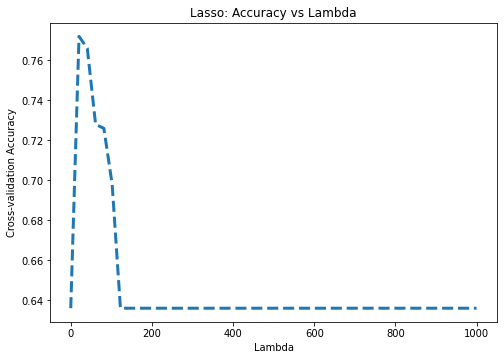

Best lambda for Lasso: 20.4082
Best accuracy: 0.7720


In [ ]:
lasso_scores = []
lambda_vals = np.linspace(0, 1000)
mean_scores = []


for lambda_val in lambda_vals:
    fold_scores = []
    lasso = LogisticRegression(penalty='l1', C=1/lambda_val, solver='liblinear', random_state=42)
    
    
    for train_idx, val_idx in kf.split(x_scaled):
        X_train_fold = x_scaled.iloc[train_idx]
        X_val_fold = x_scaled.iloc[val_idx]
        y_train_fold = y.iloc[train_idx]
        y_val_fold = y.iloc[val_idx]
        
        lasso.fit(X_train_fold, y_train_fold)
        y_pred = lasso.predict(X_val_fold)
        fold_scores.append(accuracy_score(y_val_fold, y_pred))
    
    mean_scores.append(np.mean(fold_scores))



plt.figure(figsize=(8, 5.5))
plt.plot(lambda_vals, mean_scores, linewidth=3, linestyle="--")
plt.xlabel("lambda"); plt.ylabel("cross-validation accuracy")
plt.title("lasso: accuracy vs lambda")
plt.show()

best_lambda_lasso = lambda_vals[np.argmax(mean_scores)]
print(f"Best lambda for Lasso: {best_lambda_lasso:.4f}")
print(f"Best accuracy: {np.max(mean_scores):.4f}")

*b*- LDA

In [484]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_scores = []
lda = LinearDiscriminantAnalysis()

for train_idx, val_idx in kf.split(x_scaled):
    
    X_train_fold = x_scaled.iloc[train_idx]
    X_val_fold = x_scaled.iloc[val_idx]
    y_train_fold = y.iloc[train_idx]
    y_val_fold = y.iloc[val_idx]
    
    
    lda.fit(X_train_fold, y_train_fold)
    y_pred = lda.predict(X_val_fold)
    
    
    fold_score = np.mean(y_pred == y_val_fold)
    lda_scores.append(fold_score)

print(f"cv scores: {lda_scores}")
print(f"mean CV score: {np.mean(lda_scores):.4f}")

cv scores: [0.8, 0.72, 0.76, 0.72, 0.8, 0.78, 0.74, 0.78, 0.8, 0.74]
mean CV score: 0.7640


We have cv score of 76.40%. Let's apply feature selection if we can do better.

In [485]:
from itertools import chain, combinations
def all_combinations(x):
    s = list(x)
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))

metric_store = [[],[]]
feature_indices = range(x_scaled.shape[1])
feature_names = ["a", "b", "c", "d", "e", "f", "g", "h"]

In [486]:
for i, combination in enumerate(all_combinations(feature_indices)):
    fold_scores = []
    
    for train_idx, val_idx in kf.split(x_scaled):
        X_train_fold = x_scaled.iloc[train_idx, list(combination)]
        X_val_fold = x_scaled.iloc[val_idx, list(combination)]
        y_train_fold = y.iloc[train_idx]
        y_val_fold = y.iloc[val_idx]
        
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train_fold, y_train_fold)
        y_pred = lda.predict(X_val_fold)
        fold_score = np.mean(y_pred == y_val_fold)
        fold_scores.append(fold_score)
    
    metric_store[0].append(list(combination))
    metric_store[1].append(np.mean(fold_scores))
    print(f"combination {i+1}: features={[feature_names[j] for j in combination]}, cv accuracy={np.mean(fold_scores):.4f}")

combination 1: features=['a'], cv accuracy=0.6460
combination 2: features=['b'], cv accuracy=0.7540
combination 3: features=['c'], cv accuracy=0.6340
combination 4: features=['d'], cv accuracy=0.6400
combination 5: features=['e'], cv accuracy=0.6420
combination 6: features=['f'], cv accuracy=0.6580
combination 7: features=['g'], cv accuracy=0.6440
combination 8: features=['h'], cv accuracy=0.6380
combination 9: features=['a', 'b'], cv accuracy=0.7460
combination 10: features=['a', 'c'], cv accuracy=0.6440
combination 11: features=['a', 'd'], cv accuracy=0.6740
combination 12: features=['a', 'e'], cv accuracy=0.6680
combination 13: features=['a', 'f'], cv accuracy=0.6800
combination 14: features=['a', 'g'], cv accuracy=0.6760
combination 15: features=['a', 'h'], cv accuracy=0.6520
combination 16: features=['b', 'c'], cv accuracy=0.7460
combination 17: features=['b', 'd'], cv accuracy=0.7380
combination 18: features=['b', 'e'], cv accuracy=0.7500
combination 19: features=['b', 'f'], cv a

Let's see the best feature selection

In [487]:
best_idx = np.argmax(metric_store[1])
best_features = metric_store[0][best_idx]
best_score = metric_store[1][best_idx]

print(f"best subset selection results:")
print(f"best feature combination: {[feature_names[i] for i in best_features]}")
print(f"best cv accuracy: {best_score:.4f}")

best subset selection results:
best feature combination: ['b', 'f']
best cv accuracy: 0.7800


**Findings**

We have a better cv accuracy than LDA, going from: 

cv scores: [0.8, 0.72, 0.76, 0.72, 0.8, 0.78, 0.74, 0.78, 0.8, 0.74]
mean CV score: 0.7640 or 76.40%


and we have here a cv accuracy of 78% which is a great improvement. 

**Let's visualize it:**

this plot  is comparing our current feature selection LDA with normal LDA 

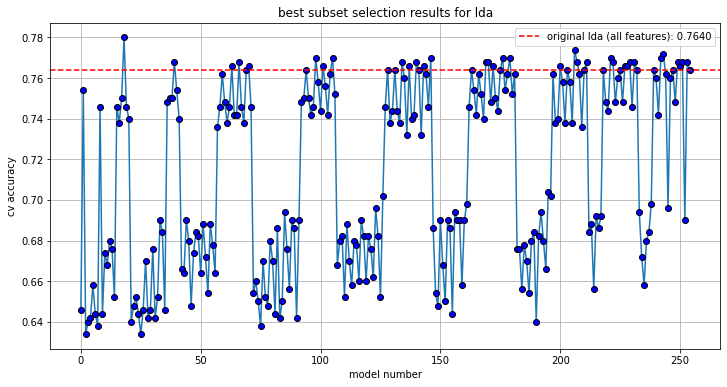

In [488]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(metric_store[1])), metric_store[1], "o-", 
         markersize=6, markeredgecolor="black", markerfacecolor="blue")
plt.xlabel("model number")
plt.ylabel("cv accuracy")
plt.title("best subset selection results for lda")
plt.grid(True)

plt.axhline(y=np.mean(lda_scores), color="r", linestyle="--", 
           label=f"original lda (all features): {np.mean(lda_scores):.4f}")
plt.legend()
plt.show()

**Evaluation final model performance: Choosing best performance for our model**

In [489]:
lda_best = LinearDiscriminantAnalysis()
X_best = x_scaled.iloc[:, best_features]
best_model_scores = []

for train_idx, val_idx in kf.split(X_best):
    X_train_fold = X_best.iloc[train_idx]
    X_val_fold = X_best.iloc[val_idx]
    y_train_fold = y.iloc[train_idx]
    y_val_fold = y.iloc[val_idx]
    
    lda_best.fit(X_train_fold, y_train_fold)
    y_pred = lda_best.predict(X_val_fold)
    best_model_scores.append(np.mean(y_pred == y_val_fold))

print(f"cv accuracy scores: {best_model_scores}")
print(f"mean cv accuracy: {np.mean(best_model_scores):.4f}")
print(f"std cv accuracy: {np.std(best_model_scores):.4f}")

cv accuracy scores: [0.82, 0.76, 0.76, 0.82, 0.8, 0.84, 0.74, 0.76, 0.78, 0.72]
mean cv accuracy: 0.7800
std cv accuracy: 0.0369


**PCA** After noticing that two features take most of the variance, I thought we could use dimension reduction to see if we can do better than our best LDA model.

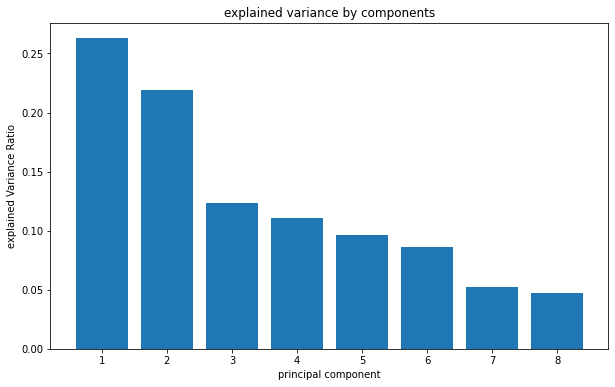

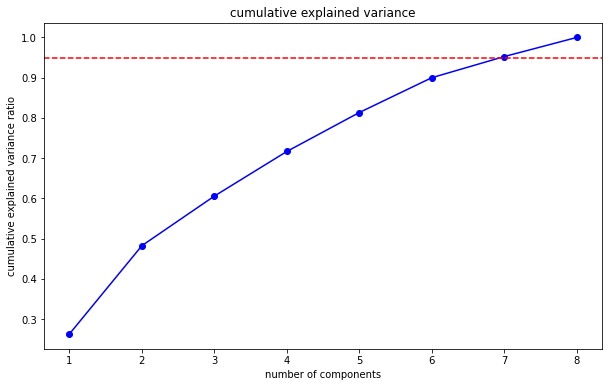

explained variance ratios: [0.26297134 0.219511   0.12326069 0.11092135 0.09676328 0.08654929
 0.05255789 0.04746515]


In [490]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_scaled)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('principal component'); plt.ylabel('explained Variance Ratio')
plt.title('explained variance by components')
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance ratio')
plt.title('cumulative explained variance')
plt.show()

print("explained variance ratios:", pca.explained_variance_ratio_)

In [491]:
#trying different number of componenets to see
n_components_list= [2, 3, 5, 7]
results= {}

for n_comp in n_components_list:
    pca = PCA(n_components=n_comp)
    pca_lda_scores = []

    for train_idx, val_idx in kf.split(x_scaled):
        X_train_fold = x_scaled.iloc[train_idx]
        X_val_fold = x_scaled.iloc[val_idx]
        y_train_fold = y.iloc[train_idx]
        y_val_fold = y.iloc[val_idx]
        
        X_train_pca = pca.fit_transform(X_train_fold)
        X_val_pca = pca.transform(X_val_fold)
        
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train_pca, y_train_fold)
        
        y_pred = lda.predict(X_val_pca)
        pca_lda_scores.append(accuracy_score(y_val_fold, y_pred))

    results[n_comp] = pca_lda_scores
    print(f"pca+lda with {n_comp} components:")
    print("pca+lda cv scores:{pca_lda_scores}")
    print(f"mean cv accuracy: {np.mean(pca_lda_scores):.4f} (±{np.std(pca_lda_scores):.4f})")

pca+lda with 2 components:
pca+lda cv scores:{pca_lda_scores}
mean cv accuracy: 0.7240 (±0.0668)
pca+lda with 3 components:
pca+lda cv scores:{pca_lda_scores}
mean cv accuracy: 0.7240 (±0.0578)
pca+lda with 5 components:
pca+lda cv scores:{pca_lda_scores}
mean cv accuracy: 0.7380 (±0.0576)
pca+lda with 7 components:
pca+lda cv scores:{pca_lda_scores}
mean cv accuracy: 0.7660 (±0.0310)


*c*- QDA

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_scores = []
qda = QuadraticDiscriminantAnalysis()

for train_idx, val_idx in kf.split(x_scaled):
    X_train, X_val = x_scaled.iloc[train_idx], x_scaled.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_val)
    qda_scores.append(accuracy_score(y_val, y_pred))

print("qda cv scores:", qda_scores)
print("qda mean accuracy: {:.4f} (±{:.4f})".format(
    np.mean(qda_scores), np.std(qda_scores)))


QDA CV scores: [0.8, 0.74, 0.76, 0.68, 0.78, 0.7, 0.78, 0.74, 0.84, 0.72]
QDA Mean Accuracy: 0.7540 (±0.0457)


*d*- Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_scores = []
bag = BaggingClassifier(
    n_estimators=100,
    random_state=42,
    oob_score=True  
)

for train_idx, val_idx in kf.split(x_scaled):
   
    X_train, X_val = x_scaled.iloc[train_idx], x_scaled.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
   
    bag.fit(X_train, y_train)
    y_pred = bag.predict(X_val)
    
    
    bag_scores.append(accuracy_score(y_val, y_pred))

print("bagging CV scores:", bag_scores)
print("bagging mean accuracy: {:.4f} (±{:.4f})".format(
    np.mean(bag_scores), np.std(bag_scores)))


print("out of bag score:", bag.oob_score_)

bagging CV Scores: [0.7, 0.76, 0.74, 0.74, 0.86, 0.74, 0.72, 0.76, 0.68, 0.7]
bagging Mean Accuracy: 0.7400 (±0.0473)
out of bag score: 0.7377777777777778


*e*- Decision Trees

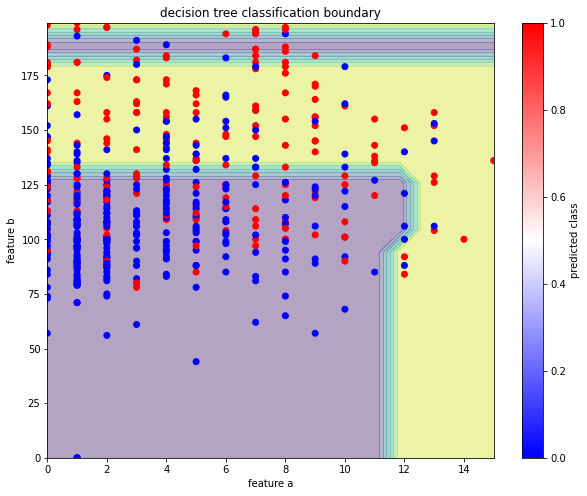

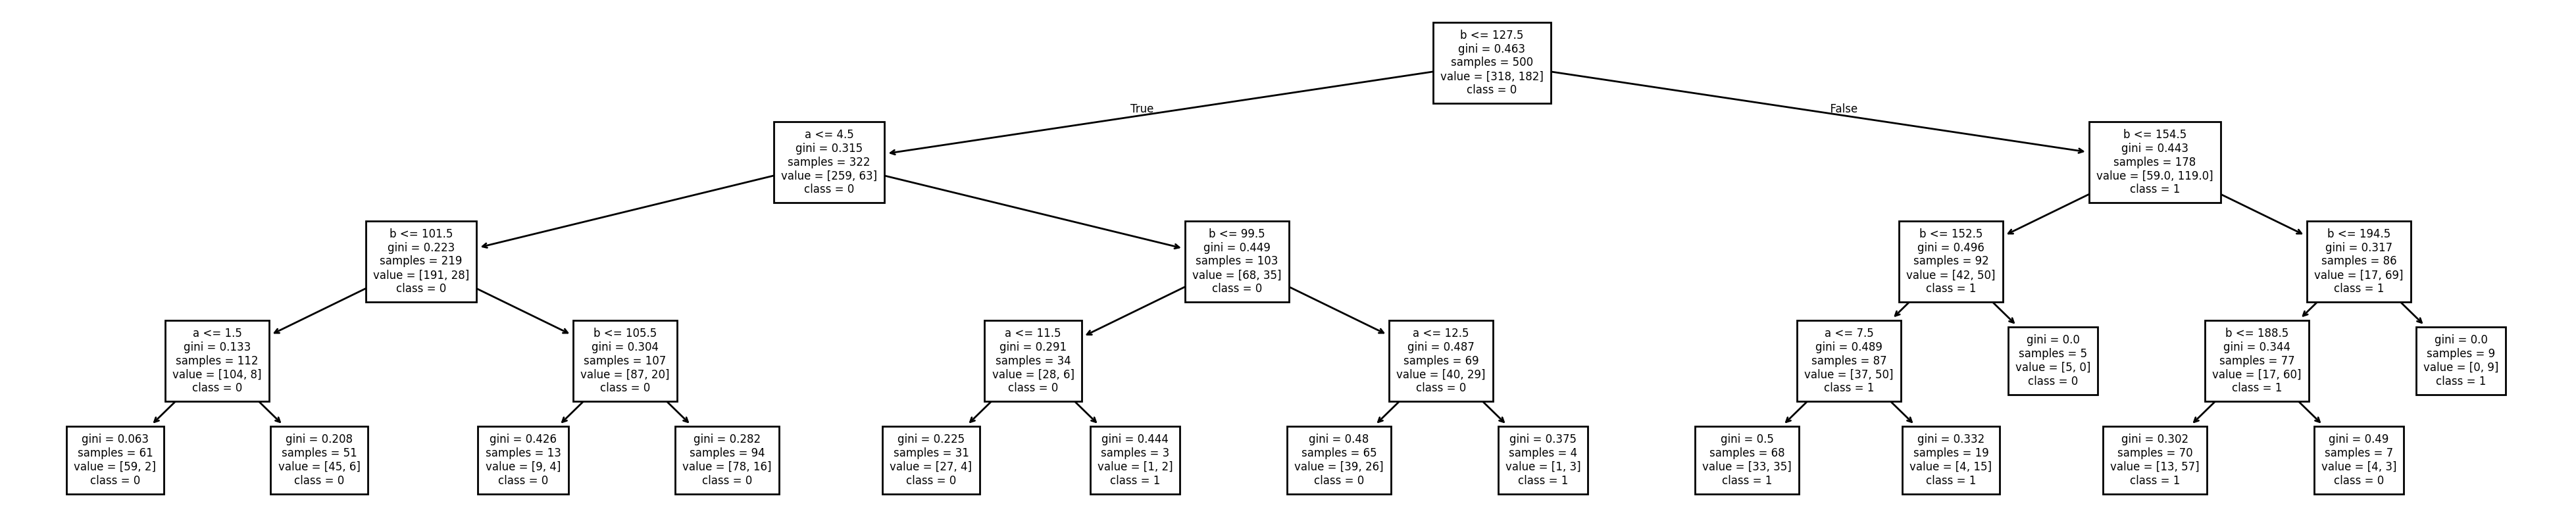

feature importance:
  feature  importance
1       b    0.855302
0       a    0.144698


In [494]:
from sklearn import tree

dt_model = tree.DecisionTreeClassifier(max_depth=4)  
result = dt_model.fit(df[['a', 'b']], df['y'])  


x = np.linspace(np.min(df['a']), np.max(df['a']), 20)
y = np.linspace(np.min(df['b']), np.max(df['b']), 20)
xv, yv = np.meshgrid(x, y)


z = result.predict(pd.DataFrame({
    'a': xv.ravel(), 
    'b': yv.ravel()
})).reshape(xv.shape)


plt.figure(figsize=(10, 8))
plt.contourf(xv, yv, z, alpha=0.4)
plt.scatter(df['a'], df['b'], c=df['y'], cmap='bwr')
plt.xlabel("feature a"); plt.ylabel("feature b")
plt.colorbar(label='predicted class')
plt.title("decision tree classification boundary")
plt.show()


plt.figure(figsize=(25,5), dpi=200)
tree.plot_tree(result, feature_names=['a', 'b'], class_names=['0', '1'], fontsize=6)
plt.show()

feature_importance = pd.DataFrame({
    'feature': ['a', 'b'],
    'importance': result.feature_importances_
})
print("feature importance:")
print(feature_importance.sort_values('importance', ascending=False))

Then we extend this to all features

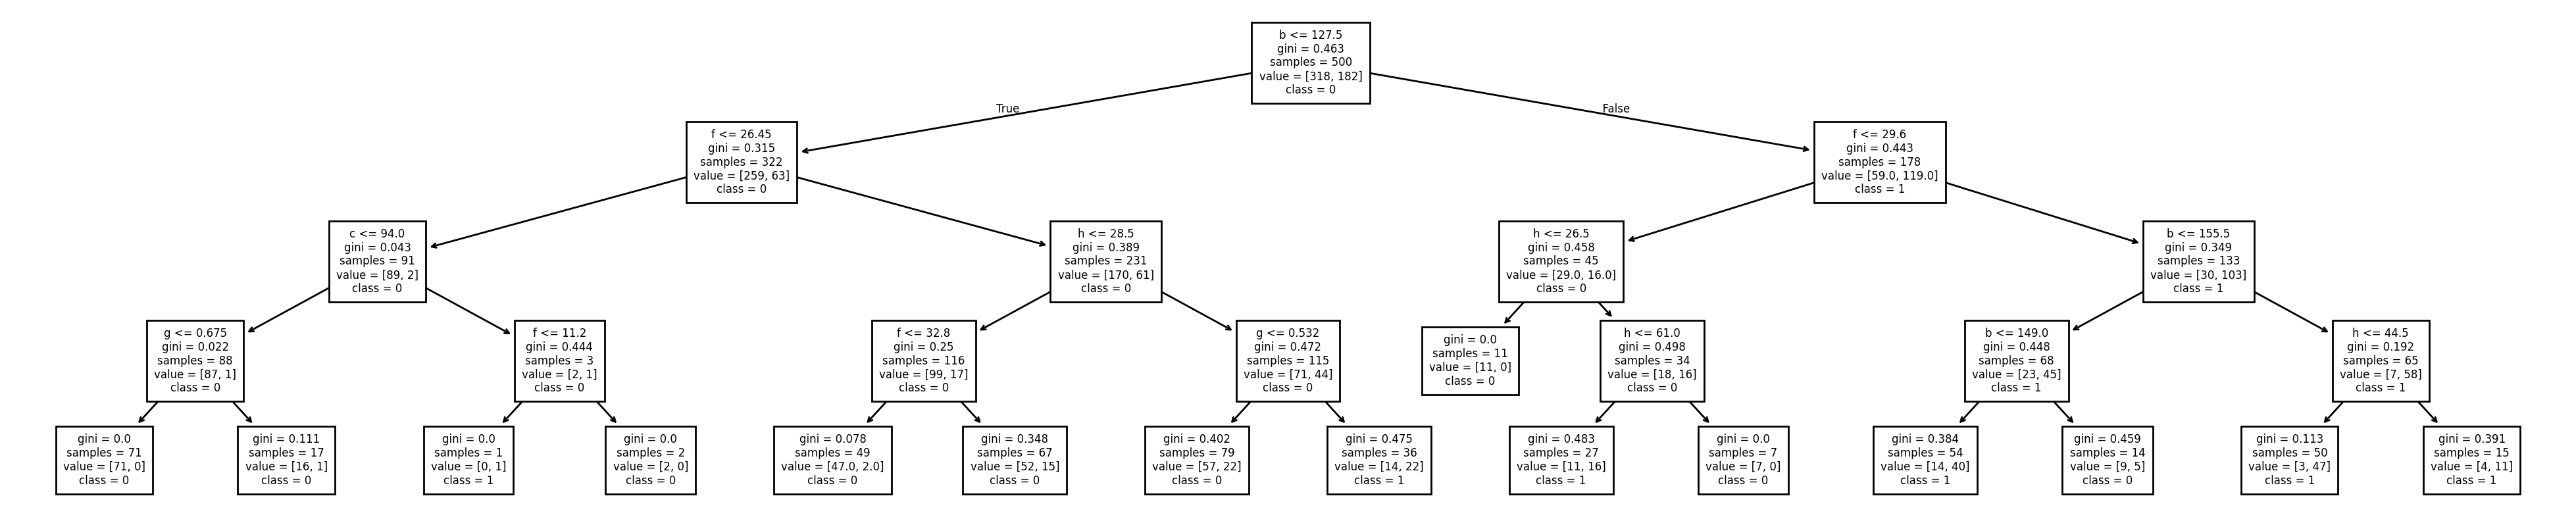


Feature Importance (all features):
  feature  importance
1       b    0.569733
5       f    0.222522
7       h    0.147225
6       g    0.054620
2       c    0.005901
0       a    0.000000
3       d    0.000000
4       e    0.000000


In [ ]:
features = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
dt_model_all = tree.DecisionTreeClassifier(max_depth=4)
result_all = dt_model_all.fit(df[features], df['y'])


plt.figure(figsize=(25,5), dpi=200)
tree.plot_tree(result_all, feature_names=features, class_names=['0', '1'], fontsize=6)
plt.show()


feature_importance_all = pd.DataFrame({
    'feature': features,
    'importance': result_all.feature_importances_
})
print("teature importance (all features):")
print(feature_importance_all.sort_values('importance', ascending=False))

*f*- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_features = X.shape[1]
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_features=int(np.sqrt(n_features)),
    random_state=42
)
rf_scores = []

for train_idx, val_idx in kf.split(x_scaled):

    X_train, X_val = x_scaled.iloc[train_idx], x_scaled.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_val)

    rf_scores.append(accuracy_score(y_val, y_pred))

print("logistic regression CV scores:", np.mean(lr_scores), "±", np.std(lr_scores))
print("random forest CV scores:", np.mean(rf_scores), "±", np.std(rf_scores))

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.featureimportances
}).sort_values('importance', ascending=False)

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

**how many predictors should i allow? (in the random forest)**

In our data the total features is 8 (a to h)
sqrt(2.82)

So let's try 2 and 3 as max_features

In [ ]:
rf_2 = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_3 = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_2 = []
scores_3 = []

for train_idx, val_idx in kf.split(x_scaled):

    X_train, X_val = x_scaled.iloc[train_idx], x_scaled.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    rf_2.fit(X_train, y_train)
    pred_2 = rf_2.predict(X_val)
    scores_2.append(accuracy_score(y_val, pred_2))
    
    rf_3.fit(X_train, y_train)
    pred_3 = rf_3.predict(X_val)
    scores_3.append(accuracy_score(y_val, pred_3))

print("rf with max_features=2:", np.mean(scores_2), "±", np.std(scores_2))
print("rf with max_features=3:", np.mean(scores_3), "±", np.std(scores_3))

rf with max_features=2: 0.748 ± 0.043543082114154516
rf with max_features=3: 0.7340000000000001 ± 0.03382306905057552


**results** 

Our random forest model with 2 max_features (predictors) is better because:

we have a higher accuracy: 74.8%, however we have a sd that's higher than if model goes with 3 predictors.

The worst case scenario (74.8% - 4.4% = 70.4%) is still comparable to the worst case of the other model (73.4% - 3.4% = 70.0%)
The best case scenario (74.8% + 4.4% = 79.2%) is better than the other model's best case (73.4% + 3.4% = 76.8%)

**Random State**

Let's use k-fold cv with different random states

In [ ]:

scores_2_multiple = []
scores_3_multiple = []

for random_state in range(5):  
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
    
    scores_2_fold = []
    scores_3_fold = []
    
    for train_idx, val_idx in kf.split(x_scaled):
        X_train, X_val = x_scaled.iloc[train_idx], x_scaled.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        rf_2.fit(X_train, y_train)
        pred_2 = rf_2.predict(X_val)
        scores_2_fold.append(accuracy_score(y_val, pred_2))
        
        
        rf_3.fit(X_train, y_train)
        pred_3 = rf_3.predict(X_val)
        scores_3_fold.append(accuracy_score(y_val, pred_3))
    
    scores_2_multiple.append(np.mean(scores_2_fold))
    scores_3_multiple.append(np.mean(scores_3_fold))

print("multiple random states Results: ")
print("rf with max_features=2: ", np.mean(scores_2_multiple), "±", np.std(scores_2_multiple))
print("rf with max_features=3: ", np.mean(scores_3_multiple), "±", np.std(scores_3_multiple))

multiple random states Results: 
rf with max_features=2:  0.7468000000000001 ± 0.011634431657799213
rf with max_features=3:  0.7468 ± 0.006273754856543244


**results of different random_state**

We have the same mean accuracy
for 2 predictors it's 74.68%, and for 3 predictors it's 74.68%
However, when it comes to the standard deviation, for 2 predictors we get: 1.2%, but for 3 predictors we have 0.6%
which indicate that max_features = 3 has lower sd and stable predictions. 

Both max_features valid, yet I will choose to go with max_features = 3 model. 

**Final Random Forest**

In [ ]:
X_array = x_scaled.values
y_array = np.array(y)


rf_3 = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)
rf_scores = []

for train_idx, val_idx in kf.split(X_array):
    
    X_train, X_val = X_array[train_idx], X_array[val_idx]
    y_train, y_val = y_array[train_idx], y_array[val_idx]
    
    rf_3.fit(X_train, y_train)
    y_pred = rf_3.predict(X_val)
    rf_scores.append(accuracy_score(y_val, y_pred))

print("random forest cv scores:", np.mean(rf_scores), "±", np.std(rf_scores))

IndexError: index 20 is out of bounds for axis 0 with size 20

5- Evaluating the Models

In [ ]:
model_scores = {
    'lda': lda_scores,
    'lda_best': best_model_scores,
    'qda': qda_scores,
    'lr': lr_scores,
    'random forest': rf_scores,
    'bagging': bag_scores,
    
}



print("model Performance Summary:")
print("-" * 50)
for name, scores in model_scores.items():
    print(f"{name:12} Mean: {np.mean(scores):.4f} (±{np.std(scores):.4f})")

model Performance Summary:
--------------------------------------------------
lda          Mean: 0.7640 (±0.0307)
lda_best     Mean: 0.7800 (±0.0369)
qda          Mean: 0.7540 (±0.0457)
lr           Mean: 0.7640 (±0.0307)
random forest Mean: nan (±nan)
bagging      Mean: 0.7400 (±0.0473)


5.1- Deciding which features matters most than others.

BoxPlot

C:\Users\test1\AppData\Local\Temp/ipykernel_11248/3588693815.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(model_scores_list,


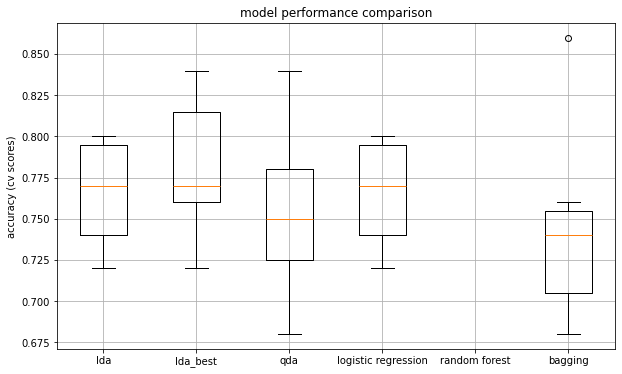

In [ ]:
model_scores_list = [model_scores[name] for name in model_scores.keys()]

model_names = list(model_scores.keys())

plt.figure(figsize=(10, 6))
plt.boxplot(model_scores_list,
            labels=model_names)
plt.title('model performance comparison')
plt.ylabel('accuracy (cv scores)')
plt.grid(True)
plt.show()

6- Results and comparing which model performs better

**Analysis** (from our plot)


* LDA, QDA and Logistic Regression show similar median accuracy
(around 0.77), yet LDA_best is slightly higher at around 0.78

* Random Forest is not shown because I had an error after finding the best max_features at 3 , couldn't figure out why

* Bagging show lower median accuracy (aound 0.73)


* LDA have moderate variance, Logistic regression almost same as LDA, while QDA have highest variance with outliers

* Good to mention that variance appear to be similar between lda and lda_best. Our tuning did not impact so much the stability of model's performance 

* Bagging showed small variance (very stable)


8- Conclusion

Overall, the plot shows us a clear performance between all the models chosen, with lda_best slightly over the normal lda. but i had an error with random forest even with best selection of features which 3 is not doing as good as in terms of mean of accuracy as the lda_best. 